In [1]:
## 1.1 import libarary
## data manipulatioon and analysis
import pandas  as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 

## statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency,pearsonr,spearmanr
## machine learning 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")




In [6]:
## Load dataset
df = pd.read_csv('hyperlocal_economy_data (1).csv')


In [9]:
print(f"data shape: {df.shape[0]} rows * {df.shape[1]} columns")

data shape: 200 rows * 35 columns


In [10]:
## memory usage
print(f"{df.memory_usage(deep=True).sum()/1024**2} MB")

0.21905994415283203 MB


In [13]:
## first look into the data
#print(df.head())

In [12]:
display(df.head())

,area_id,area_name,city,area_type,locality_type,pincode,retail_shops,restaurants,banks_atms,medical_facilities,educational_centers,parking_lots,vacant_shops,pedestrian_count_15min,vehicle_count_15min,footfall_intensity,road_condition,street_lighting,cleanliness,avg_daily_customers,avg_transaction_value,monthly_rent,business_growth,property_price_sqft,residential_rent_1bhk,property_trend,google_rating,google_reviews_count,zomato_restaurants,population_estimate,last_survey_date,competition_level,parking_availability,main_issue,news_mentions_6months
0,AREA_001,Sector 17 Market,Patiala,Urban,Commercial,143684.00,43.00,27.00,10.00,5,4,3.00,3,275,149,High,5.00,5,4.00,130.00,1324,31848.00,Growing,6245,19108.00,Falling,4.50,670.00,27.00,37039.00,2025-01-05,High,Easy,Poor infrastructure,13.00
1,AREA_002,Sector 22,Chandigarh,Semi-Urban,Mixed,141220.00,25.00,13.00,7.00,5,1,0.00,4,116,51,Medium,3.00,3,3.00,76.00,763,16898.00,Growing,4807,10138.00,Falling,4.10,1453.00,13.00,33023.00,2025-01-23,Low,Easy,High rent,9.00
2,AREA_003,Sector 35,Patiala,Urban,Commercial,NaN,NaN,NaN,NaN,4,3,NaN,NaN,NaN,177,NaN,6.00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Falling,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN
3,AREA_004,Sector 43,Patiala,Urban,Commercial,148023.00,51.00,21.00,12.00,8,6,4.00,6,278,104,High,4.00,4,4.00,181.00,1175,40822.00,Growing,7361,24493.00,Rising,4.30,2483.00,21.00,30350.00,2025-01-17,High,Moderate,High rent,16.00
4,AREA_005,Sector 8,Zirakpur,Urban,Mixed,148450.00,28.00,17.00,10.00,7,5,3.00,1,144,67,Medium,5.00,4,4.00,78.00,1388,33258.00,Growing,6404,19954.00,Falling,3.40,1897.00,17.00,46404.00,2025-01-07,High,Moderate,High rent,8.00


In [14]:
display(df.sample(5))

,area_id,area_name,city,area_type,locality_type,pincode,retail_shops,restaurants,banks_atms,medical_facilities,educational_centers,parking_lots,vacant_shops,pedestrian_count_15min,vehicle_count_15min,footfall_intensity,road_condition,street_lighting,cleanliness,avg_daily_customers,avg_transaction_value,monthly_rent,business_growth,property_price_sqft,residential_rent_1bhk,property_trend,google_rating,google_reviews_count,zomato_restaurants,population_estimate,last_survey_date,competition_level,parking_availability,main_issue,news_mentions_6months
130,AREA_131,Mullanpur Zone 2,Ambala,Urban,Commercial,149452.00,50.00,32.00,12.00,8,7,2.00,6,232,133,High,4.00,4,4.00,108.00,673,40416.00,Stable,7722,24249.00,Falling,4.60,1482.00,32.00,30864.00,2025-01-27,Low,Difficult,High rent,19.00
132,AREA_133,Derabassi Zone 2,Amritsar,Semi-Urban,Commercial,142944.00,31.00,15.00,3.00,3,5,3.00,5,108,50,Medium,4.00,4,3.00,42.00,1019,14576.00,Stable,4884,8745.00,Stable,3.30,348.00,15.00,27805.00,2025-01-04,Low,Difficult,parking shortage,0.00
144,AREA_145,Sector 20 Zone 2,Ambala,Urban,Commercial,146596.00,42.00,22.00,12.00,4,6,NaN,3,228,119,High,4.00,5,3.00,142.00,Rs 1197,38781.00,Stable,6691,23268.00,Falling,3.40,NaN,22.00,41996.00,2025-01-17,Medium,NaN,parking shortage,NaN
83,AREA_084,Chheharta,Ludhiana,Semi-Urban,Commercial,144441.00,17.00,8.00,6.00,3,2,1.00,1,64,33,Medium,3.00,3,2.00,24.00,1409,15348.00,Declining,4700,9208.00,Stable,4.00,407.00,8.00,25807.00,2025-01-16,Low,Difficult,parking shortage,11.00
8,AREA_009,Sector 11,Karnal,Rural,Mixed,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN,21,NaN,6.00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rising,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN,NaN


In [16]:
## phase 2 
## data understanding and quality assess.
print("DATASET INFO:")
df.info()

DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   area_id                 200 non-null    object 
 1   area_name               200 non-null    object 
 2   city                    200 non-null    object 
 3   area_type               200 non-null    object 
 4   locality_type           200 non-null    object 
 5   pincode                 182 non-null    float64
 6   retail_shops            188 non-null    float64
 7   restaurants             185 non-null    float64
 8   banks_atms              175 non-null    float64
 9   medical_facilities      200 non-null    int64  
 10  educational_centers     200 non-null    int64  
 11  parking_lots            162 non-null    float64
 12  vacant_shops            192 non-null    object 
 13  pedestrian_count_15min  185 non-null    object 
 14  vehicle_count_15min     200 

In [18]:
column_info=pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'non-null count': df.count().values,
    'null count':df.isnull().sum().values
})

display(column_info)

,Column,Data Type,non-null count,null count
0,area_id,object,200,0
1,area_name,object,200,0
2,city,object,200,0
3,area_type,object,200,0
4,locality_type,object,200,0
5,pincode,float64,182,18
6,retail_shops,float64,188,12
7,restaurants,float64,185,15
8,banks_atms,float64,175,25
9,medical_facilities,int64,200,0


In [25]:
## Observation template
print("KEY OBSERVATION:")
print(f"total vriables:{df.shape[1]}")
print(f"numerical varibales: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"total categorical columns:{df.select_dtypes(include=object).shape[1]}")
print(f"total missing values: {df.isnull().sum().sum()}")
print(f" duplicate rows: {df.duplicated().sum()}")

KEY OBSERVATION:
total vriables:35
numerical varibales: 19
total categorical columns:16
total missing values: 484
 duplicate rows: 0


In [27]:
## stat summary
display(df.describe().T.style.background_gradient(cmap='YlOrRd'))

,count,mean,std,min,25%,50%,75%,max
pincode,182.000000,144888.532967,2945.368259,140030.000000,142427.000000,144589.500000,147537.000000,149992.000000
retail_shops,188.000000,28.595745,16.528258,5.000000,16.750000,25.000000,34.000000,69.000000
restaurants,185.000000,13.172973,8.015767,2.000000,8.000000,11.000000,15.000000,34.000000
banks_atms,175.000000,6.457143,2.745350,2.000000,4.000000,7.000000,8.000000,12.000000
medical_facilities,200.000000,4.300000,2.191807,1.000000,3.000000,4.000000,6.000000,9.000000
educational_centers,200.000000,3.575000,1.611633,1.000000,2.000000,4.000000,5.000000,7.000000
parking_lots,162.000000,2.160494,1.482459,0.000000,1.000000,2.000000,3.000000,5.000000
vehicle_count_15min,200.000000,57.805000,40.913525,7.000000,30.000000,48.000000,71.000000,183.000000
road_condition,193.000000,3.725389,0.990700,2.000000,3.000000,4.000000,4.000000,6.000000
street_lighting,200.000000,3.695000,0.839942,2.000000,3.000000,4.000000,4.000000,5.000000


In [31]:
display(df.describe(include=object).T.style.background_gradient(cmap='YlOrRd'))

,count,unique,top,freq
area_id,200,200,AREA_001,1
area_name,200,196,Sector 9 Zone 2,2
city,200,12,Zirakpur,25
area_type,200,3,Semi-Urban,102
locality_type,200,3,Commercial,84
vacant_shops,192,16,3,40
pedestrian_count_15min,185,114,111,6
footfall_intensity,192,3,Medium,122
avg_transaction_value,175,161,1486,3
business_growth,182,3,Declining,91


In [32]:
##missing value analysis
missing_data=pd.DataFrame({
    'Column': df.columns,
    'missing_counts':df.isnull().sum().values,
    'missing_perct':(df.isnull().sum()/len(df)*100).round(2).values
})

In [34]:
display(missing_data)

,Column,missing_counts,missing_perct
0,area_id,0,0.00
1,area_name,0,0.00
2,city,0,0.00
3,area_type,0,0.00
4,locality_type,0,0.00
5,pincode,18,9.00
6,retail_shops,12,6.00
7,restaurants,15,7.50
8,banks_atms,25,12.50
9,medical_facilities,0,0.00


In [37]:
missing_data=missing_data[missing_data['missing_counts']>0].sort_values('missing_perct')

In [38]:
display(missing_data)

,Column,missing_counts,missing_perct
16,road_condition,7,3.50
12,vacant_shops,8,4.00
15,footfall_intensity,8,4.00
6,retail_shops,12,6.00
29,population_estimate,12,6.00
18,cleanliness,12,6.00
7,restaurants,15,7.50
30,last_survey_date,15,7.50
13,pedestrian_count_15min,15,7.50
21,monthly_rent,15,7.50


<Figure size 1200x600 with 0 Axes>

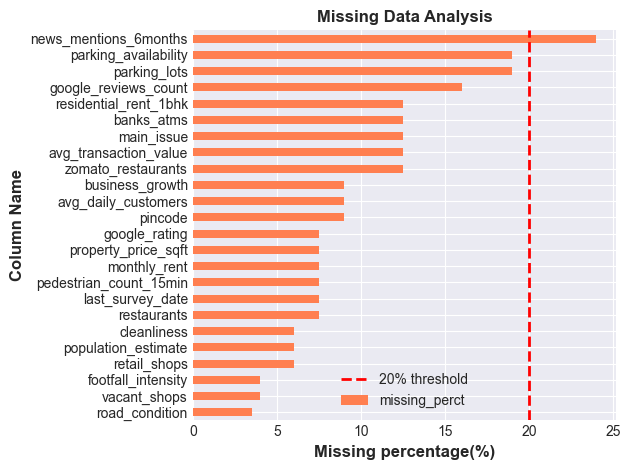

In [43]:
## viz missing data
plt.figure(figsize=(12,6))
missing_data.plot(kind='barh',x='Column',y='missing_perct',color='coral')
plt.xlabel('Missing percentage(%)',fontsize=12,fontweight='bold')
plt.ylabel('Column Name',fontsize=12, fontweight='bold')
plt.title('Missing Data Analysis',fontsize=12,fontweight='bold')
plt.axvline(x=20, color='red',linestyle='--',linewidth=2,label='20% threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
## Data Types Issues Detection
## check for the numeric columns stored as string
for col in df.select_dtypes(include='object').columns:
    # try to convert  to numeric
    try:
        num_col=pd.to_numeric(df[col])
        print(f"{col}: stored as object but shold be numeric")
        print(f"sample values: {df[col].dropna().head(3).tolist()}")
        print()
    except:
        pass

   